In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from word2number import w2n
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

### To ignore warnings


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("CarPrice.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

### Data visualization

<AxesSubplot:>

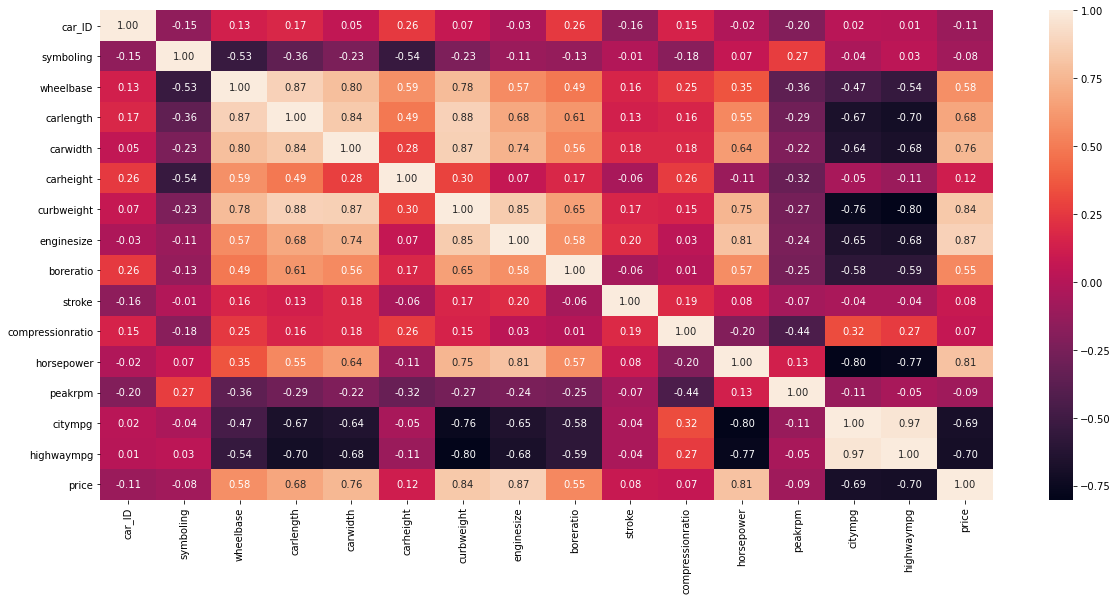

In [6]:
import seaborn as sns
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

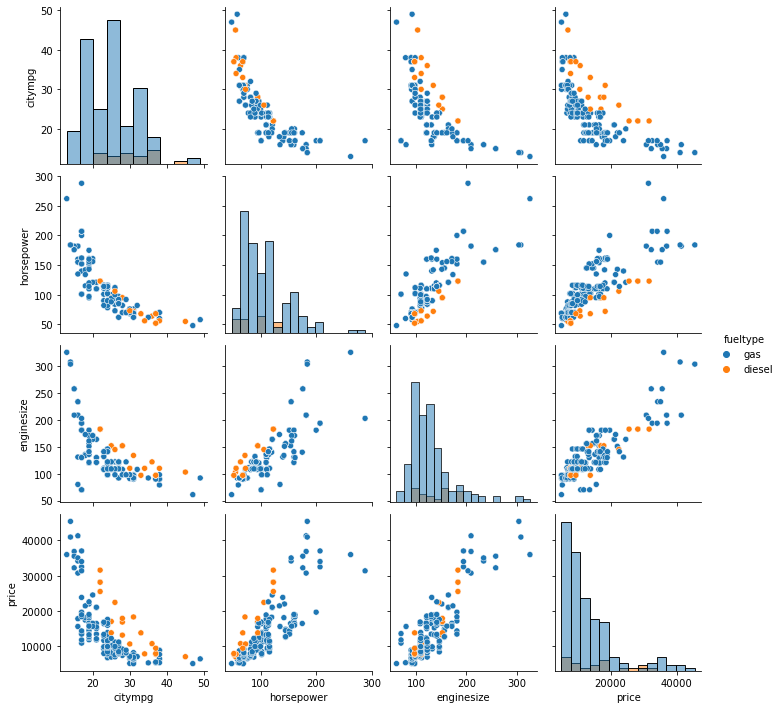

In [7]:
sns.pairplot(df[["citympg", "horsepower", "enginesize","price", "fueltype"]], hue="fueltype", diag_kind="hist")

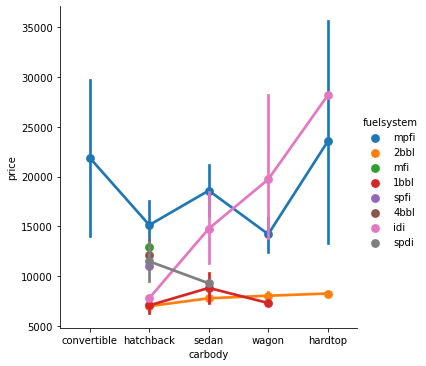

In [8]:
sns.catplot(data=df, x="carbody", y="price", hue="fuelsystem" ,kind="point")

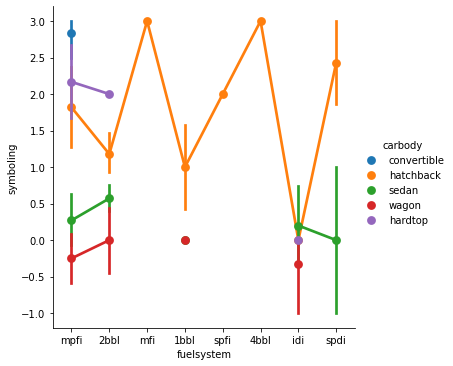

In [9]:
sns.catplot(data=df, y="symboling", x="fuelsystem" , hue="carbody" ,kind="point")

### dropping unwanted columns

In [10]:
df2 = df[['symboling','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','enginesize','horsepower','citympg','highwaympg','price']]
df2.head()

,symboling,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,enginesize,horsepower,citympg,highwaympg,price
0,3,gas,std,convertible,rwd,dohc,four,mpfi,130,111,21,27,13495.0
1,3,gas,std,convertible,rwd,dohc,four,mpfi,130,111,21,27,16500.0
2,1,gas,std,hatchback,rwd,ohcv,six,mpfi,152,154,19,26,16500.0
3,2,gas,std,sedan,fwd,ohc,four,mpfi,109,102,24,30,13950.0
4,2,gas,std,sedan,4wd,ohc,five,mpfi,136,115,18,22,17450.0


In [11]:
df2.dtypes

symboling           int64
fueltype           object
aspiration         object
carbody            object
drivewheel         object
enginetype         object
cylindernumber     object
fuelsystem         object
enginesize          int64
horsepower          int64
citympg             int64
highwaympg          int64
price             float64
dtype: object

### Checking if any null value

In [12]:
df2.isnull().values.any()

False

### Encoding the categorical data

In [13]:
df2.cylindernumber = df2.cylindernumber.apply(w2n.word_to_num)

In [14]:
df2['fueltype']       = df2['fueltype'].astype('category')
df2['aspiration']     = df2['aspiration'].astype('category')
df2['carbody']        = df2['carbody'].astype('category')
df2['drivewheel']     = df2['drivewheel'].astype('category')
df2['enginetype']     = df2['enginetype'].astype('category')
df2['fuelsystem']     = df2['fuelsystem'].astype('category')
df2.cylindernumber = df2.cylindernumber.apply(w2n.word_to_num)

ValueError: Type of input is not string! Please enter a valid number word (eg. 'two million twenty three thousand and forty nine')

In [ ]:
df2.dtypes

In [ ]:
fuelSystemTypes = df2['fuelsystem'].cat.categories
aspirationTypes = df2['aspiration'].cat.categories
carbodyTypes = df2['carbody'].cat.categories
driveWheelTypes = df2['drivewheel'].cat.categories
enginetypeTypes = df2['enginetype'].cat.categories
fuelTypeTypes = df2['fueltype'].cat.categories

In [ ]:
df2['fuelsystem'] = df2['fuelsystem'].cat.codes
df2['fueltype'] = df2['fueltype'].cat.codes
df2['aspiration'] = df2['aspiration'].cat.codes
df2['carbody'] = df2['carbody'].cat.codes
df2['drivewheel'] = df2['drivewheel'].cat.codes
df2['enginetype'] = df2['enginetype'].cat.codes

In [ ]:
df2.head()

In [ ]:
df2.dtypes

In [ ]:
df2.shape

### Selecting features and fitting the model

In [ ]:
X = df2[['symboling','fueltype','aspiration','carbody','drivewheel','enginetype','fuelsystem','cylindernumber','enginesize','horsepower','citympg','highwaympg']]
y = df2['price'].astype(int)

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [ ]:
LR = LinearRegression().fit(X_train,y_train)

In [ ]:
LR.coef_

In [ ]:
LR.intercept_

In [ ]:
LR.score(X_test,y_test)